<a href="https://colab.research.google.com/github/Aikhusy/Applied_LSTM_Autoencoder_Anomaly_Detections_For_Firewall_log/blob/main/22_01_2025_Deep_learning_LSTM_Autoencoder_Uptime_Status_Linux_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [5]:
def load_and_preprocess_data(csv_path):
    df = pd.read_csv(csv_path)

    features = ['fw_days_uptime', 'fw_number_of_users',
               'fw_load_avg_1_min', 'fw_load_avg_5_min', 'fw_load_avg_15_min']

    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.sort_values('created_at')

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[features])

    return scaled_data, scaler, features, df['created_at']

In [6]:
csv_path = '/content/uptime status.csv'
scaled_data, scaler, features, timestamps = load_and_preprocess_data(csv_path)

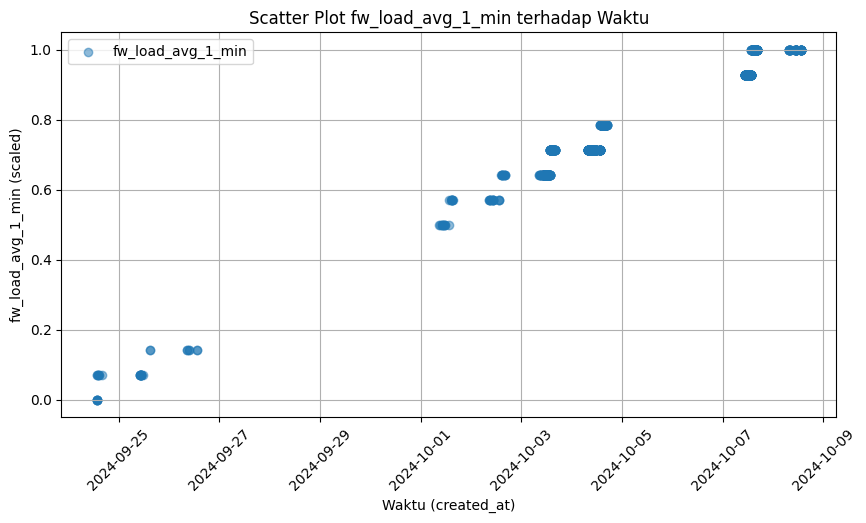

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(timestamps, scaled_data[:, 2], label='fw_load_avg_1_min', alpha=0.5)

plt.xlabel('Waktu (created_at)')
plt.ylabel('fw_load_avg_1_min (scaled)')
plt.title('Scatter Plot fw_load_avg_1_min terhadap Waktu')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

In [ ]:
def create_sequence(data, seq_length):
    sequences = []
    for i in range(len(data)-seq_length +1):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

In [ ]:
sequences = create_sequence(scaled_data, 24)

In [ ]:
def model_lstm_autoencoder(seq_length, n_features, encoding_dim=32):
    model = Sequential([
        LSTM(64,activation='relu',input_shape=(seq_length,n_features),return_sequence=True),
        LSTM(encoding_dim, activation = 'relu', return_sequences=False),
        RepeatVector(seq_length),
        LSTM(encoding_dim, activation = 'relu', return_sequences=True),
        LSTM(64,activation='relu',return_sequences=True),
        TimeDistributed(Dense(n_features))
    ])
    model.compile(optimizer='adam',loss='mse')
    return model